# Maestria en Ciencia de Datos

## Machine Learning 1

### Proyecto 2 – Modelos de clasificación supervisada para evaluar la calidad de un automovil

### Maria Angélica Robayo Torres

Mediante la exploración del conjunto de datos dado (car.data) se espera poder identificar el modelo que mejor se ajuste a la previsión correcta de la variable categorica objetivo (class).

0. Para este ejercicio usaremos un dataset del UCI Machine Learning Repository.

In [412]:
# Importamos las librerias necesarias para leer y analizar los datos.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [413]:
# Traeremos los nombres de las columnas
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
# Creamos un dataframe del conjunto de datos a trabajar
df = pd.read_csv('car.data.csv', header=None, names=col_names)

In [414]:
# Mostramos los primeros 5 registros del dataframe para coprobar que ha sido leido de manera correcta
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [415]:
# Utilizamos la función info para obtener un resumen del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


* Descripción del dataframe:

De acuerdo con la información arrojada por la función info podemos observar que el conjunto de datos tiene 7 variables, una de ellas es nuestra variable objetivo (class), de acuerdo con la información de Dtype todas estan como object, sin embargo según la muestra podemos apreciar que son 5 varibles tipo texto (categoricas) y 2 varibles tipo entero. El dataset ocntiene un total de 1728 registros de información. No hay datos nulos para ninguna de las variables. Las variables son respectivamente: el precio de compra del carro, el precio del mantenimiento del carro, el numero de puertas del carro, el numero de pasajeros del carro, el tamaño del baúl y la seguridad estimada del carro. La variable objetivo denominada class corresponde a la evaluación del vehiculo, esta puede ser: Inaceptable, aceptable, buena o muy buena.

A continuación generaremos unas gráficas que nos permitan analizar un poco más las variables del dataframe.

<Axes: xlabel='count', ylabel='class'>

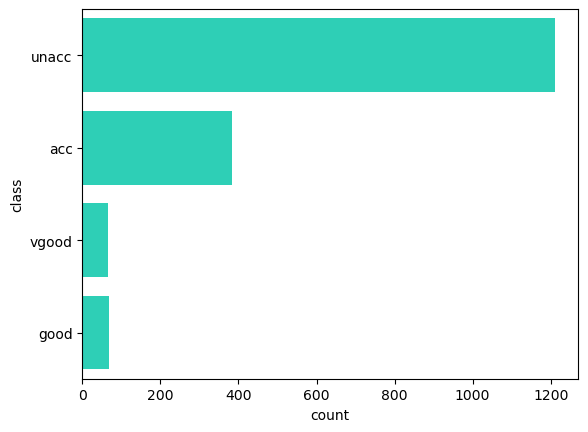

In [417]:
sns.countplot(df['class'], color='#13EAC9')

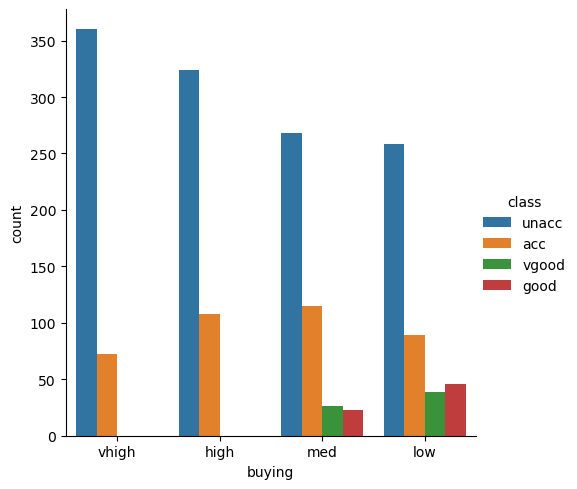

In [418]:
sns.catplot(kind='count', x='buying', hue='class', data=df)

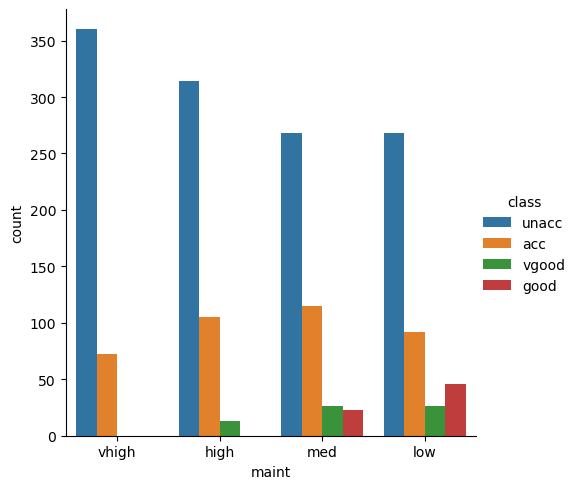

In [419]:
sns.catplot(kind='count', x='maint', hue='class', data=df)

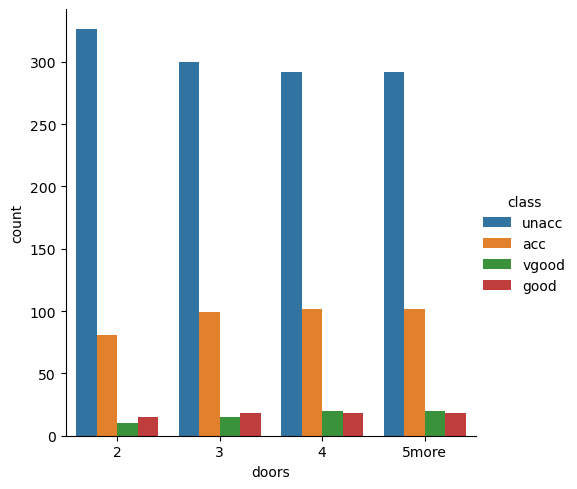

In [420]:
sns.catplot(kind='count', x='doors', hue='class', data=df)

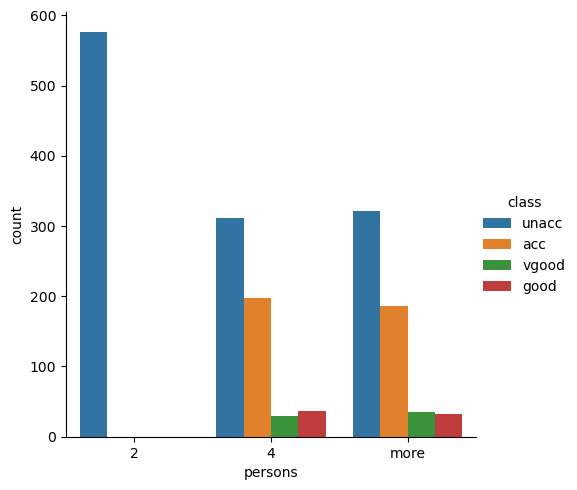

In [421]:
sns.catplot(kind='count', x='persons', hue='class', data=df)

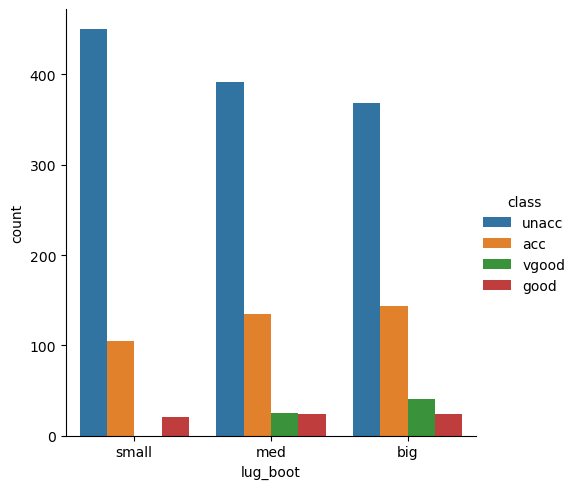

In [422]:
sns.catplot(kind='count', x='lug_boot', hue='class', data=df)

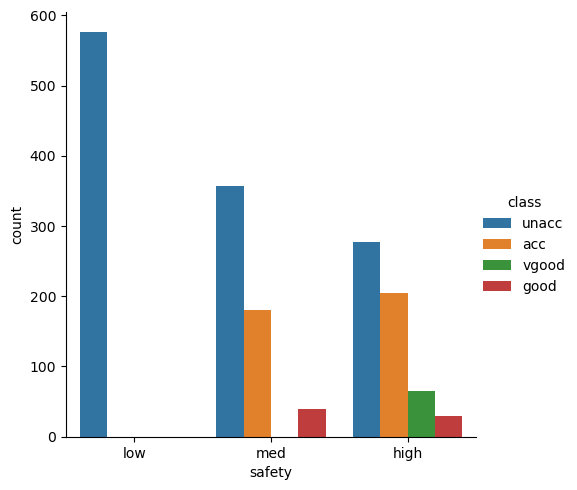

In [423]:
sns.catplot(kind='count', x='safety', hue='class', data=df)

De acuerdo con las gráficas generadas la mayoria de registros corresponde a carro con evaluacion inaceptable. Se puede inferir que no hay registros de carros con valores de compra altos o muy altos, pasa lo mismo para la variable mantenimiento, es decir, no hay registros de carros con precios de mantenimiento altos o muy altos. Con respecto al numero de pasajeros, hay una cantidad importante de vehiculos con evaluacion inaceptable que tienen solamente capacidad para dos personas, esta misma tendencia se observa con relacion a la variable de la seguridad del carro, habiendo un mayor numero de evaluaciones inaceptables para los carros con seguridad baja.

1. Preparación del df para las particiones y aplicación de modelos

In [426]:
# Obteniendo el conteo de unicos valores para cada caracteristicas del dataframe.
feature_names = list(df.columns.values[:-1])
for feature in feature_names:
    unique_count = df[feature].nunique()
    unique_vals = df[feature].unique()
    print("{}: {} values, {}".format(feature, unique_count, unique_vals))

buying: 4 values, ['vhigh' 'high' 'med' 'low']
maint: 4 values, ['vhigh' 'high' 'med' 'low']
doors: 4 values, ['2' '3' '4' '5more']
persons: 3 values, ['2' '4' 'more']
lug_boot: 3 values, ['small' 'med' 'big']
safety: 3 values, ['low' 'med' 'high']


In [427]:
# Obteniendo el conteo de unicos valores para la variable objetivo.
label_name = df.columns.values[-1]
print("{}: {} values, {}".format(label_name, df[label_name].nunique(), df[label_name].unique()))

class: 4 values, ['unacc' 'acc' 'vgood' 'good']


In [428]:
# Mostrando el conteo para cada uno de los unicos valores de la variable objetivo.
df[label_name].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [429]:
# Crear columnas dummy para las variables categoricas
df_encoded = pd.get_dummies(df, columns=feature_names, drop_first=True)
df_encoded.tail()

,class,buying_low,buying_med,buying_vhigh,maint_low,maint_med,maint_vhigh,doors_3,doors_4,doors_5more,persons_4,persons_more,lug_boot_med,lug_boot_small,safety_low,safety_med
1723,good,True,False,False,True,False,False,False,False,True,False,True,True,False,False,True
1724,vgood,True,False,False,True,False,False,False,False,True,False,True,True,False,False,False
1725,unacc,True,False,False,True,False,False,False,False,True,False,True,False,False,True,False
1726,good,True,False,False,True,False,False,False,False,True,False,True,False,False,False,True
1727,vgood,True,False,False,True,False,False,False,False,True,False,True,False,False,False,False


In [430]:
# Encode de la variable objetivo
# Esto nos facilitara la interpretacion de resultados más adelante 
df_encoded['class'], class_uniques = pd.factorize(df_encoded['class'])
df_encoded.tail()

,class,buying_low,buying_med,buying_vhigh,maint_low,maint_med,maint_vhigh,doors_3,doors_4,doors_5more,persons_4,persons_more,lug_boot_med,lug_boot_small,safety_low,safety_med
1723,3,True,False,False,True,False,False,False,False,True,False,True,True,False,False,True
1724,2,True,False,False,True,False,False,False,False,True,False,True,True,False,False,False
1725,0,True,False,False,True,False,False,False,False,True,False,True,False,False,True,False
1726,3,True,False,False,True,False,False,False,False,True,False,True,False,False,False,True
1727,2,True,False,False,True,False,False,False,False,True,False,True,False,False,False,False


In [431]:
# Guardar la variable objetivo como un ps.
class_col = df_encoded['class']
# Remover la variable objetivo del df.
df_encoded.drop(columns=['class'], inplace=True)
# Obtener la posición donde será insertada la ultima columna.
last_col_pos = df_encoded.columns.get_loc('safety_med') + 1
# Insertar la variable objetivo al final del df.
df_encoded.insert(last_col_pos, 'class', class_col)
df_encoded.tail()

,buying_low,buying_med,buying_vhigh,maint_low,maint_med,maint_vhigh,doors_3,doors_4,doors_5more,persons_4,persons_more,lug_boot_med,lug_boot_small,safety_low,safety_med,class
1723,True,False,False,True,False,False,False,False,True,False,True,True,False,False,True,3
1724,True,False,False,True,False,False,False,False,True,False,True,True,False,False,False,2
1725,True,False,False,True,False,False,False,False,True,False,True,False,False,True,False,0
1726,True,False,False,True,False,False,False,False,True,False,True,False,False,False,True,3
1727,True,False,False,True,False,False,False,False,True,False,True,False,False,False,False,2


2. Creación del modelo de ML que nos permitirá hacer previsiones correctas de nuestra variable objetivo.

Haremos el primer ejercicio con un modelo de clasificación Random Forest

In [434]:
# Para los features
X = df_encoded.loc[:, 'buying_low':'safety_med']
# Para la variable objetivo
y = df_encoded.loc[:, 'class']

In [435]:
from sklearn.model_selection import train_test_split

# Realizaremos una partición 70% : 30%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [436]:
from sklearn.ensemble import RandomForestClassifier

# Aplicaremos un modelo de clasificación random forest con 100 arboles y una aleatoriedad de 42.
clf1 = RandomForestClassifier(n_estimators=100, random_state=42)
# Entrenando el modelo.
clf1.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

3. Ahora realizaremos predicciones utilizando el modelo aplicado en el paso anterior

In [438]:
# Realizar predicciones sobre el conjunto de pruebas.
y_pred = clf1.predict(X_test)
# Mostrar las 10 primeras predicciones.
y_pred[0:10]

array([0, 3, 0, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [439]:
class_uniques

Index(['unacc', 'acc', 'vgood', 'good'], dtype='object')

In [440]:
# Presentación de resultados con los valores originales de la variable objetivo.
y_pred_labelled = class_uniques[y_pred]
# Mostrar las 10 primeras predicciones.
y_pred_labelled[0:10]

Index(['unacc', 'good', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc'],
      dtype='object')

In [441]:
# Probabilidades previstas para las 10 primeras predicciones.
clf1.predict_proba(X_test)[0:10]

array([[0.91, 0.09, 0.  , 0.  ],
       [0.26, 0.09, 0.03, 0.62],
       [0.95, 0.05, 0.  , 0.  ],
       [0.08, 0.67, 0.11, 0.14],
       [0.94, 0.04, 0.  , 0.02],
       [0.44, 0.56, 0.  , 0.  ],
       [0.99, 0.01, 0.  , 0.  ],
       [0.87, 0.11, 0.  , 0.02],
       [0.85, 0.14, 0.  , 0.01],
       [0.96, 0.04, 0.  , 0.  ]])

In [442]:
# Ahora obtendremos la exactitud de la clasificación del modelo aplicado.

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.882466281310212

In [443]:
from sklearn.metrics import confusion_matrix

# Dejando nuevamente las etiquetas originales.
y_pred = class_uniques[y_pred]
y_test = class_uniques[y_test]
# Crear matriz de confusión y establecer el orden de las filas y columnas de la matriz
# La primera sera unacceptable, la segunda acceptable, la tercera buena y la cuarta muy buena.
confusion_matrix(y_test, y_pred, labels=['unacc', 'acc', 'good', 'vgood'])

array([[351,   7,   0,   0],
       [ 17,  94,   6,   1],
       [  1,  12,   5,   1],
       [  0,  10,   6,   8]], dtype=int64)

In [444]:
from sklearn.metrics import classification_report

# Presentación del reporte de clasificación.
print(classification_report(y_test, y_pred, labels=['unacc', 'acc', 'good', 'vgood']))

              precision    recall  f1-score   support

       unacc       0.95      0.98      0.97       358
         acc       0.76      0.80      0.78       118
        good       0.29      0.26      0.28        19
       vgood       0.80      0.33      0.47        24

    accuracy                           0.88       519
   macro avg       0.70      0.59      0.62       519
weighted avg       0.88      0.88      0.88       519



4. Aplicaremos otros dos modelos más, regresion logistica y K-Nearest Neighbors, para asi tener otros puntos de comparación. 

In [518]:
# Para los features
X = df_encoded.loc[:, 'buying_low':'safety_med']
# Para la variable objetivo
y = df_encoded.loc[:, 'class']

In [520]:
from sklearn.model_selection import train_test_split

# Realizaremos una partición 70% : 30%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [522]:
## Regresión Logistica
from sklearn.linear_model import LogisticRegression

clf2 = LogisticRegression(random_state=0)
clf2.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [524]:
y_pred2 = clf2.predict(X_test)
y_pred2[0:10]

array([0, 0, 0, 0, 0, 2, 0, 1, 1, 1], dtype=int64)

In [530]:
# Probabilidades previstas para las 10 primeras predicciones.
clf2.predict_proba(X_test)[0:10]

array([[6.80805520e-01, 3.05212740e-01, 1.18825383e-03, 1.27934864e-02],
       [7.45684749e-01, 2.53957267e-01, 7.21340963e-05, 2.85849637e-04],
       [9.99998125e-01, 1.79433235e-06, 6.29226167e-09, 7.45144581e-08],
       [9.99993539e-01, 6.13886672e-06, 1.54379891e-07, 1.67580708e-07],
       [9.99550893e-01, 7.88131361e-05, 2.32231418e-04, 1.38062899e-04],
       [1.39987262e-02, 1.72597918e-01, 5.06366033e-01, 3.07037323e-01],
       [9.99996297e-01, 3.26706937e-06, 1.95410664e-08, 4.16512627e-07],
       [1.83107153e-01, 7.27651129e-01, 6.41270018e-02, 2.51147167e-02],
       [5.13572622e-02, 5.83125501e-01, 2.73216021e-02, 3.38195635e-01],
       [2.99135383e-01, 6.78323320e-01, 5.01548352e-03, 1.75258139e-02]])

In [532]:
accuracy_score(y_test, y_pred2)

0.8805394990366089

In [452]:
# Presentación de resultados con los valores originales de la variable objetivo.
y_pred2_labelled = class_uniques[y_pred2]
# Mostrar las 10 primeras predicciones.
y_pred2_labelled[0:10]

Index(['unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'vgood', 'unacc', 'acc',
       'acc', 'acc'],
      dtype='object')

In [534]:
y_pred2 = class_uniques[y_pred2]
y_test = class_uniques[y_test]
confusion_matrix(y_test, y_pred2, labels=['unacc', 'acc', 'good', 'vgood'])

array([[346,  17,   0,   0],
       [ 18,  93,   4,   0],
       [  0,  15,   6,   4],
       [  0,   4,   0,  12]], dtype=int64)

In [536]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

         acc       0.72      0.81      0.76       115
        good       0.60      0.24      0.34        25
       unacc       0.95      0.95      0.95       363
       vgood       0.75      0.75      0.75        16

    accuracy                           0.88       519
   macro avg       0.76      0.69      0.70       519
weighted avg       0.88      0.88      0.87       519



In [556]:
# Para los features
X = df_encoded.loc[:, 'buying_low':'safety_med']
# Para la variable objetivo
y = df_encoded.loc[:, 'class']

In [557]:
from sklearn.model_selection import train_test_split

# Realizaremos una partición 70% : 30%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [558]:
## KNN

from sklearn.neighbors import KNeighborsClassifier

clf3 = KNeighborsClassifier(n_neighbors=10)

clf3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [559]:
y_pred3 = clf3.predict(X_test)
y_pred3[0:10]

array([1, 0, 0, 0, 0, 2, 0, 1, 3, 0], dtype=int64)

In [560]:
clf3.predict_proba(X_test)[0:10]

array([[0.3, 0.7, 0. , 0. ],
       [0.7, 0.3, 0. , 0. ],
       [1. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. ],
       [0.9, 0. , 0.1, 0. ],
       [0.3, 0.2, 0.4, 0.1],
       [0.9, 0.1, 0. , 0. ],
       [0.3, 0.5, 0.2, 0. ],
       [0.3, 0.3, 0. , 0.4],
       [0.5, 0.5, 0. , 0. ]])

In [561]:
accuracy_score(y_test, y_pred3)

0.8073217726396917

In [562]:
y_pred3_labelled = class_uniques[y_pred3]
y_pred3_labelled[0:10]

Index(['acc', 'unacc', 'unacc', 'unacc', 'unacc', 'vgood', 'unacc', 'acc',
       'good', 'unacc'],
      dtype='object')

In [563]:
y_pred3 = class_uniques[y_pred3]
y_test = class_uniques[y_test]
confusion_matrix(y_test, y_pred3, labels=['unacc', 'acc', 'good', 'vgood'])

array([[359,   4,   0,   0],
       [ 55,  56,   3,   1],
       [  7,  12,   3,   3],
       [  9,   6,   0,   1]], dtype=int64)

In [564]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

         acc       0.72      0.49      0.58       115
        good       0.50      0.12      0.19        25
       unacc       0.83      0.99      0.91       363
       vgood       0.20      0.06      0.10        16

    accuracy                           0.81       519
   macro avg       0.56      0.41      0.44       519
weighted avg       0.77      0.81      0.77       519



Conclusiones:

De los tres modelos aplicados, el que mejor puntaje de rendimiento obtuvo fue el primero (random forest) con un valor de 88.24% de aciertos en sus prediciones, seguido de la regresion logistica con un valor de 88.05%, mientras que el modelo de clasificación KNN tuvo un porcentaje de aciertos de 80.73% siendo el valor más bajo de los 3 modelos aplicados. 

Algo que podemos apreciar en todos los reportes de clasificacion de los diferentes modelos aplicados, es que los valores de precision y recall son altos para los carros con evaluación incaeptable, es decir que el modelo funciona muy bien para esta clase.

Por otro lado, los valores de precision y recall para los carros con evaluación buena y muy buena, son bajos, esto era de esperarse debido a que el conjunto de datos tenia muy pocos datos para estas clases, esto incide directamente en el entrenamineto del modelo para predecir estas clases.

La misma situación se puede apreciar en las matrices de confusión generadas, pues en todos los casos las terceras y cuartas filas/columnas tienen los valores más bajos (pocas clasificaciones corectas para las clases buena y muy buena). 